In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pickle

<h1>Pre-processing our data (train and test)</h1>

In [2]:
# Processing our dataset
CATEGORIES = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
IMG_SIZE = 48

train_data = []
test_data = []

def create_training_data():
    DATADIR = './facial_data/train/'
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)   #path to emotions directory
        class_num = CATEGORIES.index(category)   #Since our model deals with numeric values instead of string values, we convert the classes to numbers based on their index location in CATEGIRES
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_arr = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                train_data.append([new_arr, class_num])
            except Exception as e:
                pass
    random.shuffle(train_data)    
    X_train = []
    y_train = []

    for features, label in train_data:
        X_train.append(features)
        y_train.append(label)
    
    X_train = np.array(X_train)#.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # WARNING: You need to check in your notes how to reshape data, so that PyTorch doesn't crash when you try to load your data (e.g. [channels, width, height])

    new_train_data = (X_train, y_train)
    
    # Dumping training data
    pickle_out = open("X_train.pickle", "wb")
    pickle.dump(X_train, pickle_out)
    pickle_out.close()

    pickle_out = open("y_train.pickle", "wb")
    pickle.dump(y_train, pickle_out)
    pickle_out.close()

def create_testing_data():
    DATADIR = './facial_data/test/'
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)   #path to emotions directory
        class_num = CATEGORIES.index(category)   #Since our model deals with numeric values instead of string values, we convert the classes to numbers based on their index location in CATEGIRES
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_arr = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                test_data.append([new_arr, class_num])
            except Exception as e:
                pass
    random.shuffle(test_data)
    X_test = []
    y_test = []

    for features, label in test_data:
        X_test.append(features)
        y_test.append(label)
    
    X_test = np.array(X_test)#.reshape(-1, IMG_SIZE, IMG_SIZE, 1) # WARNING: You need to check in your notes how to reshape data, so that PyTorch doesn't crash when you try to load your data (e.g. [channels, width, height])

    new_test_data = (X_test, y_test)
    
    # Dumping testing data
    pickle_out = open("X_test.pickle", "wb")
    pickle.dump(X_test, pickle_out)
    pickle_out.close()

    pickle_out = open("y_test.pickle", "wb")
    pickle.dump(y_test, pickle_out)
    pickle_out.close()
            
create_training_data()
create_testing_data()

5


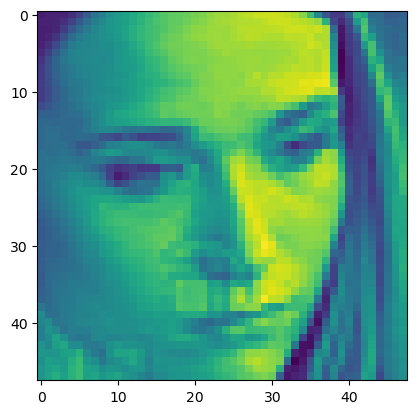

In [3]:
i = 4000
plt.imshow(train_data[i][0])
print(train_data[i][1])